In [1]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup as bs
import requests as req

In [2]:
headerInfo = {
    "user-agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/124.0.0.0 Safari/537.36"
}

In [3]:
search_url = "https://search.naver.com/search.naver?sm=tab_hty.top&where=nexearch&ssc=tab.nx.all&query=%EC%98%81%ED%99%94+%ED%8C%8C%EB%AC%98+%EB%A6%AC%EB%B7%B0&oquery=%ED%8C%8C%EB%AC%98&tqi=iBuLwlqo1fsssj9svIossssstso-288181"

res = req.get(search_url, headerInfo)

html = bs(res.text,'lxml')

In [4]:
html

<!DOCTYPE html>
<html lang="ko"><head> <meta charset="utf-8"/> <meta content="always" name="referrer"/> <meta content="telephone=no,address=no,email=no" name="format-detection"/> <meta content="영화 파묘 리뷰 : 네이버 통합검색" property="og:title"/> <meta content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png" property="og:image"/> <meta content="'영화 파묘 리뷰'의 네이버 통합검색 결과입니다." property="og:description"/> <meta content="'영화 파묘 리뷰'의 네이버 통합검색 결과입니다." lang="ko" name="description"/> <title>영화 파묘 리뷰 : 네이버 통합검색</title> <link href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico" rel="shortcut icon"/> <link href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" rel="search" title="Naver" type="application/opensearchdescription+xml"/><script> if (top.frames.length!=0 || window!=top) window.open(location, "_top"); </script><link href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_240314.css" rel="stylesheet" type="text/css"/> <link href="https://ss

In [19]:
aTags = html.select("dt > a.review_link")
link_list = []

for a in aTags:
    # url 주소에 'blog'가 포함된 주소만 리스트에 저장하도록 구현
    if 'blog' in a['href']:
        link_list.append(a['href'])

In [20]:
link_list

['https://blog.naver.com/luckymasiwoo/223385669689',
 'https://blog.naver.com/pooh0512/223355435422',
 'https://blog.naver.com/travelhyuk/223394161535',
 'https://blog.naver.com/zjvl851/223354865945',
 'https://blog.naver.com/didim_yeoul/223429570885',
 'https://blog.naver.com/cine_play/223360460033',
 'https://blog.naver.com/kijoon1018/223375471108']

In [47]:
res2 = req.get(link_list[2],headerInfo)
html2 = bs(res2.text,'lxml')

In [48]:
html2

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html lang="ko">
<head>
<meta content="no-cache" http-equiv="Pragma"/>
<meta content="-1" http-equiv="Expires"/>
<meta content="noindex,follow" name="robots"/>
<meta content="always" name="referrer"/>
<meta content="text/html;charset=utf-8" http-equiv="content-type"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<link href="/favicon.ico?3" rel="shortcut icon" type="image/x-icon"/>
<link href="https://rss.blog.naver.com/travelhyuk.xml" rel="alternate" title="RSS feed for travelhyuk Blog" type="application/rss+xml"/>
<link href="https://blog.naver.com/NBlogWlwLayout.naver?blogId=travelhyuk" rel="wlwmanifest" type="application/wlwmanifest+xml"/>
<title>임씨의 지구를 지켜라!! : 네이버 블로그</title>
</head>
<script charset="UTF-8" src="https://ssl.pstatic.net/t.static.blog/mylog/versioning/Frameset-527057374_https.js" type="text/javascript"></script>
<script charset

In [49]:
#iframe 태그의 src 속성 가져오기 -> 실제 페이지 주소
src = html2.select_one("#mainFrame")['src']

blog_url = 'https://blog.naver.com'+src
print(blog_url)

https://blog.naver.com/PostView.naver?blogId=travelhyuk&logNo=223394161535&redirect=Dlog&widgetTypeCall=true&noTrackingCode=true&directAccess=false


In [50]:
blog_res = req.get(blog_url, headerInfo)
blog_html = bs(blog_res.text, 'lxml')

In [51]:
blog_content = blog_html.select_one('div.se-main-container').text
blog_content = blog_content.replace('\n','')
blog_content

"\u200b 영화 파묘 정보 천만 돌파 글로벌 흥행도 엄청나다 \u200b  극장 비수기인 2월 22일 개봉한 이 작품이 고작 32일만인 어제 3월 24일 일요일 자로 천만 관객을 돌파했다. 비수기였던 것도 대단하지만, 오컬트라는 비주류 장르를 가지고 이런 성과를 이뤄낸 것이 더 대단하다. 한때는 티켓값이 올라 사람들이 극장에 안 간다는 것이 기정사실처럼 받아들여진 적도 있었지만, 이번에 영화 파묘가 증명했듯이 잘 만든 작품이라면 사람들은 언제나 지갑을 열 준비가 되어있다. 개봉전 시사회 결과 워낙에 입소문이 좋았던 바 나같은 경우에도 개봉일에 한 번 보고 이후 문화의 날에도 또 다시 관람했다. 오컬트를 떠나 아주 몰입도 높은 작품이었다.\u200b\u200b 파묘 감독장재현출연최민식, 김고은, 유해진, 이도현, 김재철, 김민준, 김병오, 전진기, 박정자, 박지일개봉                                                2024.02.22.  \u200b수상한 묘를 이장한 풍수사 김상덕(최민식), 장의사 고영근(유해진), 무당 이화림(김고은), 법사 윤봉길(이도현) 4인방에게 벌어지는기이한 사건을 담은 이 오컬드 미스터리가 엄청난 인기를 누리고 있다. 개봉일인 2월 22일 목요일부터 무려 33만명의 관객이 들어 그 시작이 심상치 않더니. 고작 개봉 1주일 만에 300만을 돌파했다. 그래도 이때까지는 천만 관객이 확실치 되지는 않았다. 장르 특성상 관객이 급락할꺼라 예상한 것이다.\u200b  \u200b그렇지만 험한 것을 두 번이나 본 관객들을 중심으로 재미있다는 입소문이 급속도로 퍼져나갔고, 개봉 2주차에도 전주와 거의 비슷한 330만의 관객이 들었다. 영화 파묘 같은 경우 결말 해석 정보를 보면 알 수 있듯이 항일 코드가 숨겨져 있는 작품이다보니 31절 특수를 타고서 계속해서 사람들이 극장을 찾았던 것이다. 이때부터 이제 1,000만 관객 이야기가 본격적으로 나오기 시작했다. 이 흐름이 계속된다면 당연한 일이긴 했다.\u20

## 모든 영화리뷰 블로그 페이지의 내용을 출력하시오

In [29]:
link_list

['https://blog.naver.com/luckymasiwoo/223385669689',
 'https://blog.naver.com/pooh0512/223355435422',
 'https://blog.naver.com/travelhyuk/223394161535',
 'https://blog.naver.com/zjvl851/223354865945',
 'https://blog.naver.com/didim_yeoul/223429570885',
 'https://blog.naver.com/cine_play/223360460033',
 'https://blog.naver.com/kijoon1018/223375471108']

In [56]:
import time
f = open('review.text','w',encoding='utf-8')

def content_temp(row,header):
    res_1 = req.get(row,headers=header)
    html_1 = bs(res_1.text,'lxml')
    time.sleep(3)

    src_1 = html_1.select_one("#mainFrame")['src']
    blog_url = 'https://blog.naver.com'+src_1
    blog_res = req.get(blog_url, headers=header)
    blog_html = bs(blog_res.text, 'lxml')
    time.sleep(2)

    blog_content = blog_html.select_one('div.se-main-container').text
    blog_content = blog_content.replace('\n','')
    time.sleep(2)
    
    return print(blog_content)

for i in range(len(link_list)):
    content_temp(link_list[i],headerInfo)
    f.write(blog_content)
f.close()
    

수상한 묘를 이장한 풍수사와 장의사 그리고 무속인. 이후 그들에게 벌어지는 기이한 사건을 그린 파묘 영화를 흥미롭게 보셨나요? 지난 2월 22일 개봉해 벌써 866만 명을 돌파하며 인기는 물론 흥행까지 성공했습니다.​한반도와 척추 그리고 쇠말뚝, 도굴과 첩장, 친일과 일제강점기 등 보면서 상황을 파악하고 해석할 내용이 있는 작품이었습니다. 이 부분이 매력적이었는데요. 이를 비롯해 궁금했던 장면을 해석해 보고 파묘 관객수와 영화 정보를 살피는 글을 준비했습니다.​​​ 0. 영화 <파묘>정보를 살펴봅니다.영제Exhuma개봉일2024.02.22​국가는 한국입니다. 장르는 오컬트와 스릴러와 공포와 미스터리입니다. 관람등급은 15세 관람가를 받았고, 러닝타임은 134분으로 2시간 14분 동안 상영됩니다. 각본과 감독은 사바하와 검은 사제들의 장재현입니다. 주연과 인물을 맡은 출연진은 최민식과 유해진과 김고은과 이도현입니다. 배우들이 맡은 등장인물은 상덕과 영근과 화림과 봉길입니다.​​​ 제작비는 140억 원으로 알려졌습니다. 손익분기점은 330만 명으로 훌쩍 넘겨버렸답니다. 현재까지 영화 파묘 관객수는 866만 명입니다. 조만간 영화 관객수 900만 명을 넘길 것으로 보입니다.​​​ 1. 줄거리먼저 시놉시스를 살펴봅니다.미국의 LA에서 거액의 의뢰를 받은 무당 화림과 봉길은 이상한 병이 대물림된다는 집안의 후손, 장손을 만나게 됩니다. 조상의 묫자리가 화근이었음을 알아챈 화림은 이장을 권하고, 돈이 필요한 장의사 영근과 냄새를 맡은 풍수사 상덕이 합류합니다.​​​ 그런데 절대 사람이 묻히면 안 되는 악지에 자리한 묘. 상덕은 불길한 기운을 느껴 제안을 거절했지만 주위의 설득으로 파묘를 시작합니다. 결국 나와서는 안될 것이 나왔습니다.​​​ 2. 6장왜 이렇게 나눴을까요?지금부터 파묘 해석 및 궁금했던 점을 알아보도록 하겠습니다. 작품은 1장부터 6장으로 구성되었습니다. 왜 그렇게 설정했느냐는 물음에 장을 나누면 관객들이 따라가기 쉬울 것이라 생각했다고 밝혔습니다.​​​

In [53]:
# 파일 쓰기 읽기 실습.
# w: 쓰기, r: 읽기
f = open('test.txt','w')
f.write('Hello')
f.close()

In [55]:
f = open('test.txt','r')
f.readline()
f.close()

# 영화 리뷰데이터를 활용한 워드클라우드 그려보기

In [57]:
!pip install wordcloud

   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   --- ----------------------------------- 30.7/300.2 kB 640.0 kB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 3.7 MB/s eta 0:00:00


In [58]:
from wordcloud import WordCloud

import matplotlib.pyplot as plt


In [59]:
f = open('review.text','r', encoding='utf-8')
review = f.readline()
f.close()


In [66]:
#리뷰데이터 - 워드클라우드 결과 변수에 저장
wc = WordCloud(
    font_path='C:/Windos/Fonts/malgunbd.ttf',
    background_color='white'
).generate(review)

(-0.5, 399.5, 199.5, -0.5)

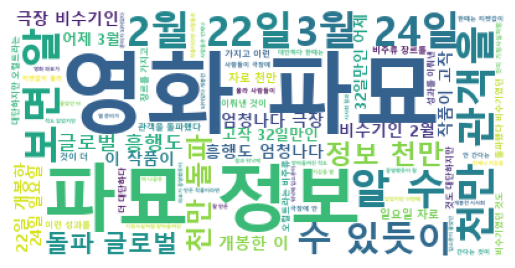

In [67]:
plt.imshow(wc)
plt.axis('off')